# Basic exploration of data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
# imports
import numpy as np
import pandas as pd

# load data
xls = pd.ExcelFile('/content/drive/MyDrive/TakTakTak/BDD_Thorsten.xlsx')
games = pd.read_excel(xls, 'Games')
organic_players = pd.read_excel(xls, 'Organic players')
campaign_players = pd.read_excel(xls, 'Campaign players')
sessions_org = pd.read_excel(xls, 'Sessions_organic')
sessions_camp = pd.read_excel(xls, 'Sessions_campaign')

RenameMapping = {
    "GameName": "gamen_name",
    "Game Id": "gameid",
    "Game Subject": "subject",
    "Game mechanics": "game_mechanic",
    "School Level (junior, middle, high)": "school_level",
    "Registration date & time": "time",
    "Accumulated minutes per session": "duration", 
    "Learnig Index per session": "learn_index",
    "Game Recomendations after session (6)": "game_recommend",
    "Click on recommendation": "click_recommend",
    "User Id": "userid",
    "Gender": "gender",
    "Age": "age",
    "Session Id": "sessionid",
    "Session login": "session_date",
    "Session logout": "session_logout_date",
}

games = games.rename(columns=RenameMapping)
organic_players = organic_players.rename(columns=RenameMapping)
campaign_players = campaign_players.rename(columns=RenameMapping)
sessions_org = sessions_org.rename(columns=RenameMapping)
sessions_camp = sessions_camp.rename(columns=RenameMapping)

# Create unions
players_total = pd.concat([campaign_players, organic_players], ignore_index=True)  # .drop_duplicates()
sessions_total = pd.concat([sessions_camp, sessions_org], ignore_index=True) # .drop_duplicates()


In [57]:

sessions_total = sessions_total[sessions_total["gameid"] != 48]

# Data size and shape

In [5]:
print("number of sessions")
print("camp", sessions_camp.shape) # 44703 rows
print("org", sessions_org.shape) # 9949 rows
print("total", sessions_total.shape)
print()
print("number of users:")
print("camp", campaign_players.shape) # 44703 rows
print("org", organic_players.shape) # 9949 rows
print("total", players_total.shape)
print()
print("Number of games:", games.shape)


number of sessions
camp (44703, 9)
org (9949, 9)
total (54006, 9)

number of users:
camp (1500, 7)
org (1526, 7)
total (3026, 7)

Number of games: (73, 5)


In [6]:
print("Earliest session", sessions_total["session_date"].min())
print("Latest session", sessions_total["session_date"].max())
print("Time window", sessions_total["session_date"].max()-sessions_total["session_date"].min())

Earliest session 2019-09-02 00:07:00
Latest session 2022-08-31 18:52:00
Time window 1094 days 18:45:00


In [7]:
print("games list of columns:")
print(games.columns)

print()
print("users list of columns")
print(players_total.columns)
print()
print("users list of columns")
print(list(sessions_total.columns))

games list of columns:
Index(['Game Name', 'gameid', 'subject', 'game_mechanic', 'school_level'], dtype='object')

users list of columns
Index(['userid', 'gender', 'age', 'time', 'Country', 'State', 'Municipality'], dtype='object')

users list of columns
['userid', 'sessionid', 'gameid', 'session_date', 'session_logout_date', 'duration', 'learn_index', 'game_recommend', 'click_recommend']


# Unique values for games

In [8]:
for col in games.columns:
  tmp = games[col].unique()
  print(col)
  print(tmp)
  print()

Game Name
['Cucarachilandia' 'Mateo y los videojuegos perdidos'
 'Acrobacias de Chan-Pi' 'Huye del Tejón' 'Duelo de espadas'
 'Las aventuras del Hombre Bala' 'Conviértete en Fortacho'
 'Planeta Miedo 2.0' 'Reto Top' 'Lombrices para todos' 'Pinta la carpa'
 'Conjuro Mágico' 'Tesoro Cí\xadber' 'Desactiva la bomba' 'Troglones'
 'Topo Cañón' 'Mascota extraviada' 'Imágenes de la Patria' 'Octavio Paz'
 'Calle K' 'Wayna' 'Caracol' 'El viaje de Kaori (antes Naves Espaciales)'
 'Tirin Tirin' 'Pim Pooom' 'Robotanque' 'La Máquina Analí\xadtica'
 'Árbol Ramón' 'Mundial Animal' 'Popol Buuuu' 'Chan-Pi Kart'
 'Inspector Pok' 'Isla Tortuga' 'Ritmo' '¡Atrápame!' 'Base 10'
 'Kilometrus' 'Beni (antes El Secreto de las Gemas)' 'Deli Monster'
 'Super Sumas' 'Lumilab X (antes Luminab X)' 'Moles' 'Micros' 'Melodines'
 'Corre Cheto' 'Boris' 'Ojo Rojo' 'Sheepy' 'Las Golosinas Secretas'
 'Materia' 'Electrolab Y' 'Amicu' 'Bolo' 'Pueblo Chinampa'
 'La pizza é mobile' 'Despachamoco' '¡Llévele, llévele!'
 'Extratel

In [9]:
for col in players_total.columns:
  tmp = players_total[col].unique()
  if tmp.size > 60:
    continue
  print(col)
  print(np.sort(tmp))
  print()

gender
[1 2]

age
[ 5  6  7  8  9 10 11 12 13 14 15]

Country
['Argentina' 'Austria' 'Chile' 'Colombia' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Honduras' 'Italy' 'Mexico' 'Peru' 'Russian Federation'
 'Saudi Arabia' 'Spain' 'United States' 'Venezuela']



Gender ratio: 1 is male, 2 is female
1    1567
2    1459
Name: gender, dtype: int64
Male % 0.5178453403833444
Female % 0.48215465961665566
Age counts
5     238
6     306
7     406
8     447
9     499
10    507
11    328
12    157
13     60
14     37
15     41
Name: age, dtype: int64


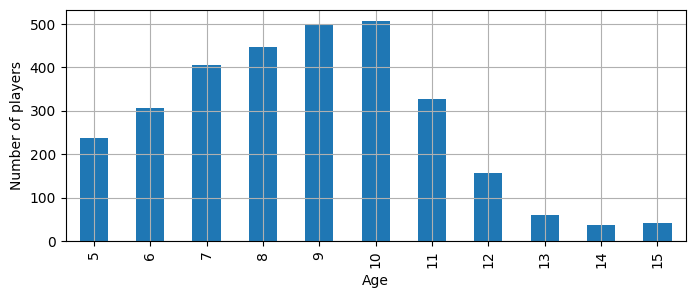

In [10]:
ax = players_total["age"].value_counts(sort=False).sort_index().plot.bar(figsize=(8,3)) #.hist(column="age", bins=16-5, figsize=(8,3), sharex=True, sharey=True) #layout = (2, 1))
import matplotlib.pyplot as plt
plt.title(label="")
plt.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Number of players")

print("Gender ratio: 1 is male, 2 is female")
print(players_total["gender"].value_counts())
print("Male %", 1567 / ( 1567+1459))
print("Female %", 1459 / ( 1567+1459))

print("Age counts")
print(players_total["age"].value_counts().sort_index())


# These session features contain NA's

In [11]:

for col in sessions_total.columns:
  tmp = sessions_total[col].isna()
  if tmp.any():
    print(col)
    #print(tmp)
    print()

# game_recommend and click_recommend contain NA's

game_recommend

click_recommend



# the users with the most sessions

In [12]:


_df = sessions_total.groupby("userid", as_index=False)["sessionid"].count()

print(_df[(_df["sessionid"].max()-200) <= _df["sessionid"]])

#        userid  sessionid
# 441   1010765        310
# 1030  1082210        434
# 1174  1085926        296
# 1764  1104324        475
# 2056  1128361        303
# 2475  1199287        327

print("user is camp", campaign_players[campaign_players["userid"] == 1082210]["userid"].any())
print("user is org", organic_players[organic_players["userid"] == 1082210]["userid"].any())



print("user is camp", campaign_players[campaign_players["userid"] == 1104324]["userid"].any())
print("user is org", organic_players[organic_players["userid"] == 1104324]["userid"].any())


       userid  sessionid
441   1010765        309
1030  1082210        432
1174  1085926        296
1764  1104324        464
1820  1106110        273
2056  1128361        302
2475  1199287        298
user is camp True
user is org False
user is camp True
user is org False


<ipython-input-58-87f33cc1a82c>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(sessions_total["session_date"].describe())


count                   54006
unique                  48665
top       2020-11-19 11:00:00
freq                        6
first     2019-09-02 00:07:00
last      2022-08-31 18:52:00
Name: session_date, dtype: object
2020-06-13 15:11:00


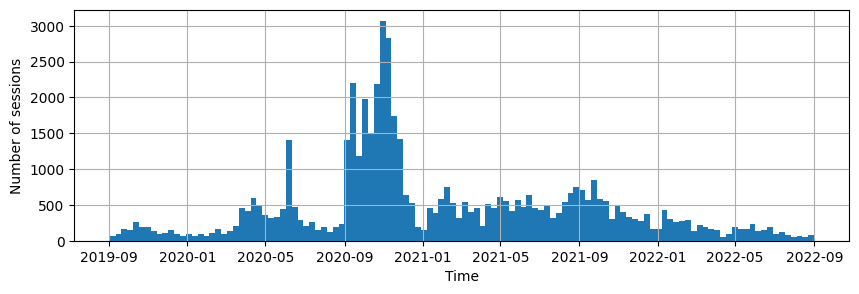

In [58]:
ax = sessions_total["session_date"].hist(bins=120, figsize=(10,3))

plt.title(label="")
# plt.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Number of sessions")

print(sessions_total["session_date"].describe())
# date range is from 2019-09-02 to 2022-08-31

print(sessions_total["session_date"][1])


count          54006
unique          1072
top       2020-10-27
freq             604
Name: session_date, dtype: object


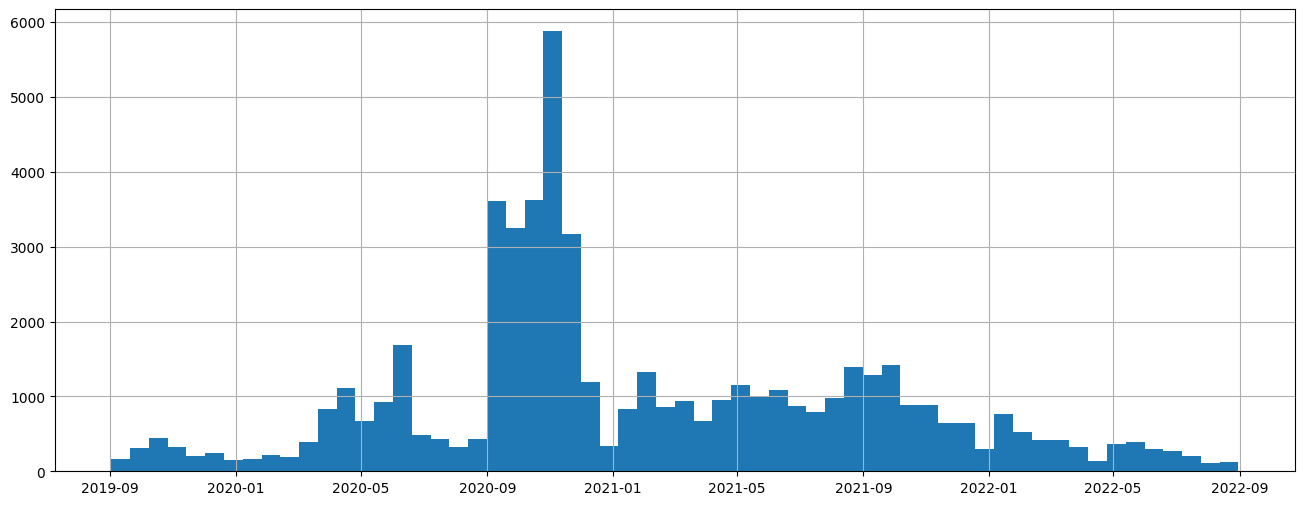

In [14]:
_df = sessions_total.copy()
_df["session_date"] = [ x.date() for x in _df["session_date"]] # strip time information
_df["session_date"].hist(bins=60, figsize=(16,6))
print(_df["session_date"].describe())

<Axes: >

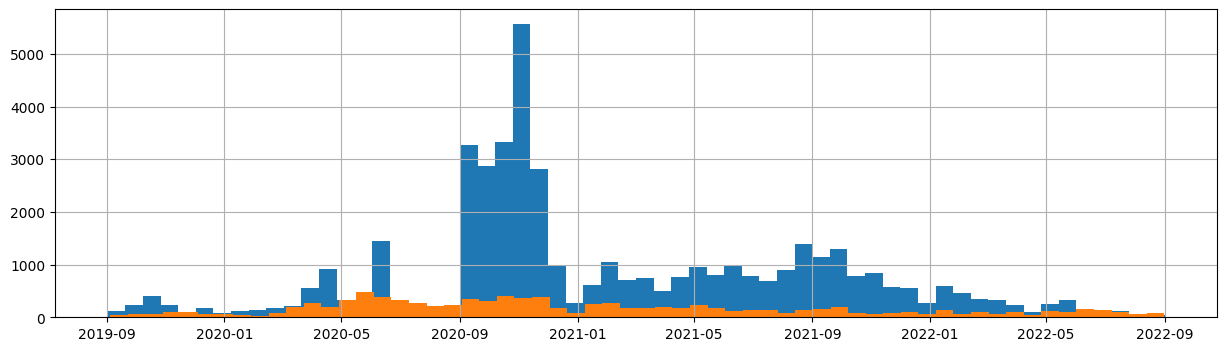

In [15]:
# sessions_total["session_date"].hist(bins=60, figsize=(16,6))
sessions_camp["session_date"].hist(bins=60, figsize=(15,4))
sessions_org["session_date"].hist(bins=60, figsize=(15,4)) # orange

In [60]:
# the average time frame for users, what is the duration between a users earliest session and latest session

def time_frame(users, sessions):
  # users is organic, campaign or total
  # sessions is equ
  tmp = {"userid": [], "mindate": [],"maxdate": []}
  for user in users["userid"]:
    user_sess = sessions[sessions["userid"] == user]
    min_date = user_sess["session_date"].min()
    max_date = user_sess["session_date"].max()
    tmp["userid"].append(user)
    tmp["mindate"].append(min_date)
    tmp["maxdate"].append(max_date)
  return pd.DataFrame(tmp)

# _df = time_frame(campaign_players, sessions_camp)
# _df = time_frame(organic_players, sessions_org)
_df = time_frame(players_total, sessions_total)
_df.describe()

,userid
count,3.026000e+03
mean,1.100919e+06
std,8.055557e+04
min,8.919820e+05
25%,1.044203e+06
50%,1.091810e+06
75%,1.158470e+06
max,1.256935e+06


             userid                    timeframe
count  3.026000e+03                         3026
mean   1.100919e+06   81 days 15:31:26.728354264
std    8.055557e+04  152 days 13:52:49.048079742
min    8.919820e+05              0 days 00:00:00
25%    1.044203e+06              0 days 00:42:00
50%    1.091810e+06              1 days 21:44:00
75%    1.158470e+06             80 days 23:06:00
max    1.256935e+06           1053 days 02:14:00
False
             userid     timeframe
count  3.026000e+03  3.026000e+03
mean   1.100919e+06  7.054287e+15
std    8.055557e+04  1.318277e+16
min    8.919820e+05  0.000000e+00
25%    1.044203e+06  2.520000e+12
50%    1.091810e+06  1.646400e+14
75%    1.158470e+06  6.995160e+15
max    1.256935e+06  9.098724e+16
             userid    timeframe
count  3.026000e+03  3026.000000
mean   1.100919e+06    81.646837
std    8.055557e+04   152.578345
min    8.919820e+05     0.000000
25%    1.044203e+06     0.029167
50%    1.091810e+06     1.905556
75%    1.158470e

Text(0, 0.5, 'Number of players')

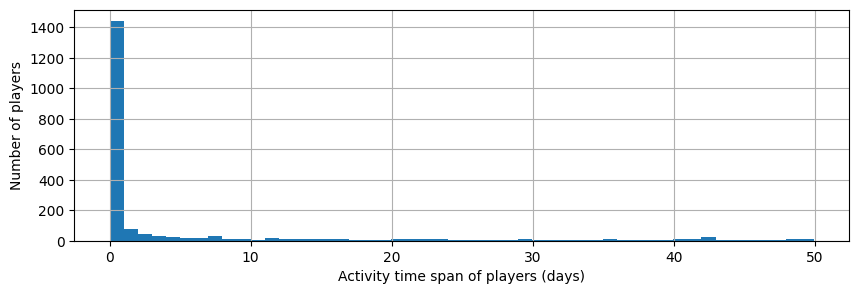

In [61]:
# how long are the users active on the platform
_df["timeframe"] = _df["maxdate"] - _df["mindate"]
print(_df.describe())
print(_df["timeframe"].isna().any())
_df["timeframe"] = _df["timeframe"].values.astype("float64")
print(_df.describe())
_df["timeframe"] = _df["timeframe"] / (1.8e11 / 3 * 60 * 24) # convert the huge numbers to days
print(_df.describe())
ax = _df[(_df["timeframe"] <= 50) & (_df["timeframe"] > 0)]["timeframe"].hist(bins=50, figsize=(10,3))

plt.title(label="")
# plt.grid()
ax.set_xlabel("Activity time span of players (days)")
ax.set_ylabel("Number of players")

# Demographics

In [18]:
# Players that are exactly the same
# same age, gender, country, state and municipality
# specifically organic players because they are probably more likely to create new accounts

# _df = sessions_total.merge(players_total, on="userid", how="left")
_df = organic_players.copy()
# _dfcount = _df.groupby(["Municipality", "State", "Country", "gender","age"]).count()
# print(_dfcount[_dfcount["userid"] > 4]["userid"])

# put into thesis
# only use country gender and age
_dfcount = _df.groupby(["Country", "gender","age"]).count()
print(_dfcount[_dfcount["userid"] > 1]["userid"])


Country      gender  age
Colombia     1       5      75
                     6      60
                     7      74
                     8      35
                     9      49
                     10     37
                     11     22
                     12     13
                     13      7
                     14      3
                     15      8
             2       5      33
                     6      35
                     7      41
                     8      63
                     9      49
                     10     52
                     11     19
                     12     22
                     13      9
                     14      5
                     15     12
Ecuador      1       7       2
                     8       9
                     9      17
                     10      9
                     11     11
                     12      7
                     13      2
             2       7       3
                     8       4
              

In [19]:
_dfcount = players_total.groupby(["gender","age"]).count()
print(_dfcount[_dfcount["userid"] > 1]["userid"])
print("By gender")
_dfcount = players_total.groupby(["gender"]).count()
print(_dfcount[_dfcount["userid"] > 1]["userid"])
print("By age")
_dfcount = players_total.groupby(["age"]).count()
print(_dfcount[_dfcount["userid"] > 1]["userid"])

gender  age
1       5      166
        6      184
        7      222
        8      214
        9      247
        10     235
        11     161
        12      79
        13      29
        14      13
        15      17
2       5       72
        6      122
        7      184
        8      233
        9      252
        10     272
        11     167
        12      78
        13      31
        14      24
        15      24
Name: userid, dtype: int64
By gender
gender
1    1567
2    1459
Name: userid, dtype: int64
By age
age
5     238
6     306
7     406
8     447
9     499
10    507
11    328
12    157
13     60
14     37
15     41
Name: userid, dtype: int64


In [20]:

print(sessions_total[~sessions_total["gameid"].isin(games["gameid"])].groupby("gameid")["gameid"].count()) 
# Found gameid 48 not in games list


Series([], Name: gameid, dtype: int64)


# How to calculate Y - Test

In [21]:
print(list(games["gameid"]))

user_id = sessions_total["userid"][0]
print("user id:", user_id)

# test on how to calculate for Y
score = {game_id : sessions_total[(sessions_total["userid"] == user_id) & (sessions_total["gameid"] == game_id)]["learn_index"].mean() for game_id in games["gameid"]}
print("score:", score)
# UserScoreDf = pd.concat([UserScoreDf, pd.Series([user_id, score])], ignore_index=True)

###tmp =  pd.Series({"userid":user_id, "score":score}).to_frame().T

tmp = pd.Series(score).to_frame().fillna(0)
print("sum", tmp.sum())
tmp = tmp / tmp.sum() # scale to be within 1
print("tmp", tmp[tmp[0] != 0])


[1, 3, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 27, 28, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99]
user id: 892257
score: {1: nan, 3: nan, 7: nan, 8: nan, 9: nan, 10: nan, 11: nan, 12: nan, 14: nan, 15: nan, 16: nan, 17: nan, 18: nan, 19: nan, 20: 2.6666666666666665, 22: nan, 23: nan, 25: nan, 27: nan, 28: nan, 34: nan, 35: 0.6666666666666666, 36: nan, 37: nan, 38: nan, 39: nan, 40: nan, 41: nan, 42: nan, 43: nan, 44: 2.0, 45: 1.0, 46: nan, 53: nan, 54: nan, 56: nan, 57: 2.0, 58: nan, 59: nan, 60: 0.75, 61: nan, 62: nan, 63: nan, 64: nan, 65: nan, 66: nan, 67: nan, 68: nan, 70: nan, 71: nan, 72: nan, 74: 2.0, 75: nan, 76: nan, 77: nan, 78: nan, 79: nan, 82: nan, 83: nan, 84: nan, 85: nan, 86: nan, 87: nan, 89: nan, 90: nan, 91: nan, 92: nan, 93: nan, 94: nan, 95: nan, 96: nan, 98: nan, 99: nan}
sum 0

In [22]:
sessions_total["userid"][0]

892257

# which positions are clicked most often

             userid     sessionid       gameid     duration  learn_index  \
count  9.817000e+03  9.817000e+03  9817.000000  9817.000000  9817.000000   
mean   1.090531e+06  6.791720e+06    52.869003     9.707693     0.585413   
std    6.386163e+04  5.223038e+05    30.101556    15.711273     0.913129   
min    8.927190e+05  5.707768e+06     1.000000     0.516700     0.000000   
25%    1.080220e+06  6.448753e+06    34.000000     1.533300     0.000000   
50%    1.088697e+06  6.739222e+06    59.000000     4.283300     0.000000   
75%    1.108497e+06  7.222530e+06    79.000000    10.983300     1.000000   
max    1.256883e+06  7.793925e+06    99.000000   204.133300     3.000000   

       click_recommend  
count      9817.000000  
mean         50.619639  
std          29.402935  
min           1.000000  
25%          28.000000  
50%          57.000000  
75%          76.000000  
max          99.000000  
[4, 2, 3, 4, 3, 1, 5, 1, 0, 0, 1, 4, 0, 1, 0]
size :  9817


Text(0, 0.5, 'Number of clicks')

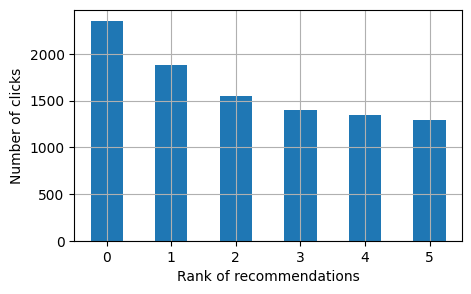

In [23]:
# filter for only those where the recommendation is clicked
where_click = sessions_total[sessions_total["game_recommend"].notna() & sessions_total["click_recommend"].notna()]
print(where_click.describe())
# have to calculate which position

index_clicked = []
for index, row in where_click.iterrows():
    games_rec = row["game_recommend"]
    # print(games_rec)
    selected_game = row["click_recommend"]
    # print(selected_game)
    games_rec = games_rec.split(",")
    index_clicked.append(games_rec.index(str(int(selected_game))))

print(index_clicked[:15])
print("size : ", len(index_clicked))

ax = pd.Series(index_clicked).value_counts().plot.bar( figsize=(5, 3),rot=0)
#plt.xticks(rotation=90)
#hist(bins=6, figsize=(14, 5))
plt.title(label="")
plt.grid()
ax.set_xlabel("Rank of recommendations")
ax.set_ylabel("Number of clicks")

# Sessions

count    3026.000000
mean       17.847323
std        33.576140
min         1.000000
25%         4.000000
50%         6.000000
75%        15.000000
max       464.000000
Name: sessionid, dtype: float64


Text(0, 0.5, 'Number of players')

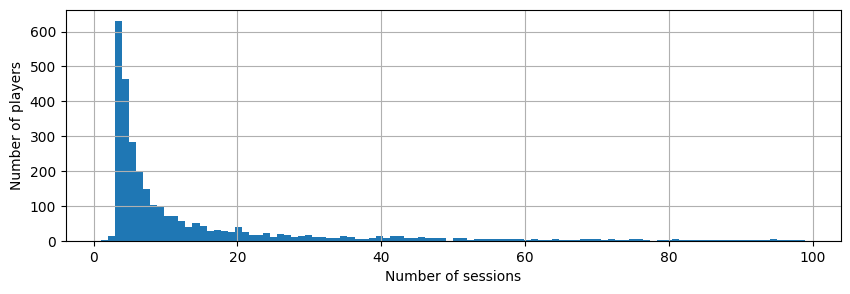

In [62]:
# How many sessions do we have per user
# create hist

_session_per_user = sessions_total.groupby("userid")["sessionid"].count()
print(_session_per_user.describe())

ax = _session_per_user[_session_per_user < 100].hist(bins=100, figsize=(10, 3))

plt.title(label="")
# plt.grid()
ax.set_xlabel("Number of sessions")
ax.set_ylabel("Number of players")

count    1500.000000
mean       29.802000
std        43.761439
min         3.000000
25%         6.000000
50%        14.000000
75%        35.000000
max       475.000000
Name: sessionid, dtype: float64


<Axes: >

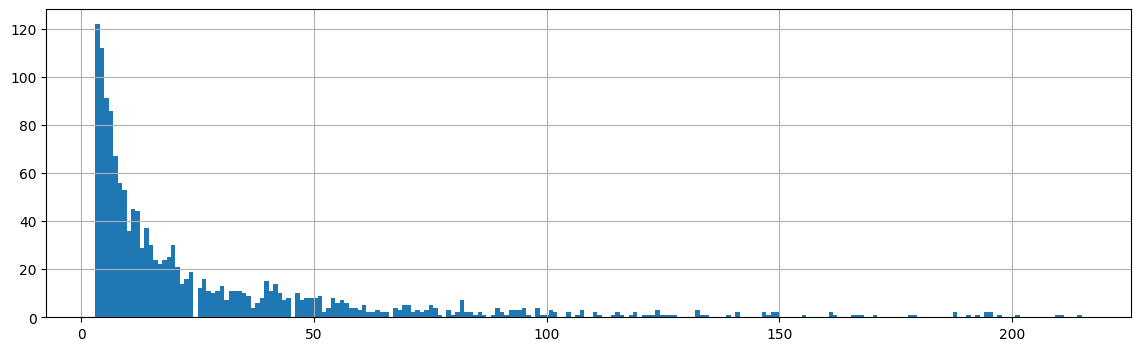

In [25]:

_session_per_user = sessions_camp.groupby("userid")["sessionid"].count()
print(_session_per_user.describe())

_session_per_user[_session_per_user < 220].hist(bins=222, figsize=(14, 4))


count    1526.000000
mean        6.519659
std        11.980939
min         3.000000
25%         3.000000
50%         4.000000
75%         6.000000
max       303.000000
Name: sessionid, dtype: float64


<Axes: >

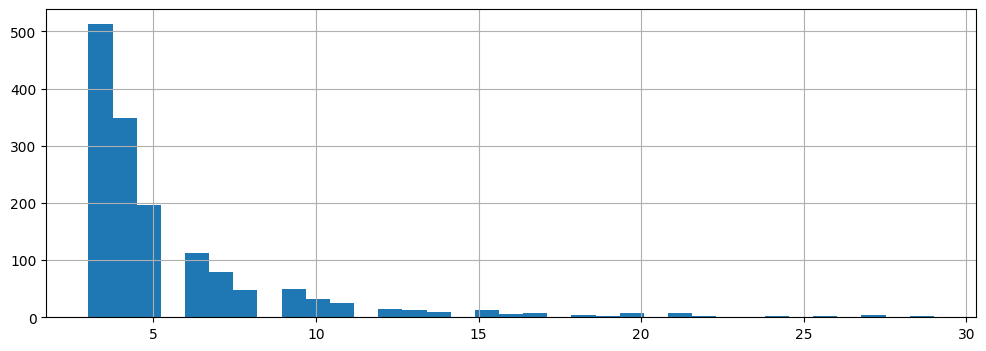

In [26]:

_ses_org = sessions_org.groupby("userid")["sessionid"].count()

print(_ses_org.describe())

_ses_org[_ses_org < 30].hist(bins=35, figsize=(12, 4))

count    54006.000000
mean        16.874361
std         26.656340
min          0.016700
25%          3.750000
50%          8.216700
75%         18.816700
max        299.966700
Name: duration, dtype: float64
mode: 0    0.5167
Name: duration, dtype: float64


Text(0, 0.5, 'Number of players')

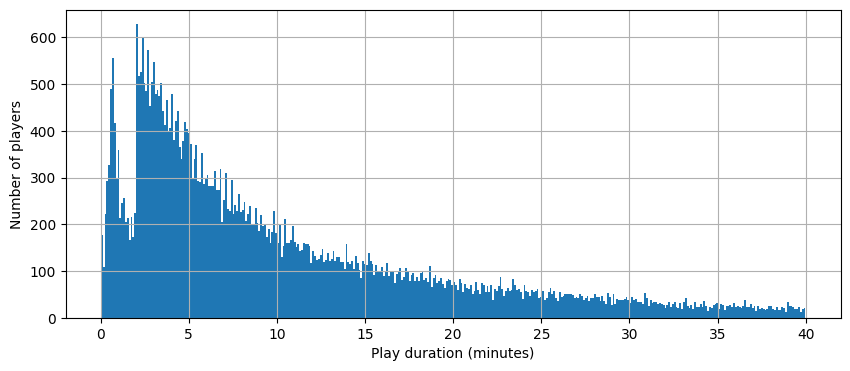

In [63]:
# Play time
# create hist

ax = sessions_total[sessions_total["duration"] < 40]["duration"].hist(bins=380, figsize=(10, 4))
# sessions_camp[sessions_camp["duration"] < 40]["duration"].hist(bins=120, figsize=(15, 5)) # orange
# sessions_org[sessions_org["duration"] < 40]["duration"].hist(bins=120, figsize=(15, 4)) # green
print(sessions_total["duration"].describe())

print("mode:", sessions_total["duration"].mode())

plt.title(label="")
# plt.grid()
ax.set_xlabel("Play duration (minutes)")
ax.set_ylabel("Number of players")


<ipython-input-28-67cf853101b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  where_click["click_recommend"] = where_click["click_recommend"].astype("int")


0    3.0
Name: click_recommend, dtype: float64
3.0     740
1.0     541
44.0    490
86.0    469
65.0    449
92.0    314
20.0    285
35.0    233
93.0    231
91.0    230
Name: click_recommend, dtype: int64


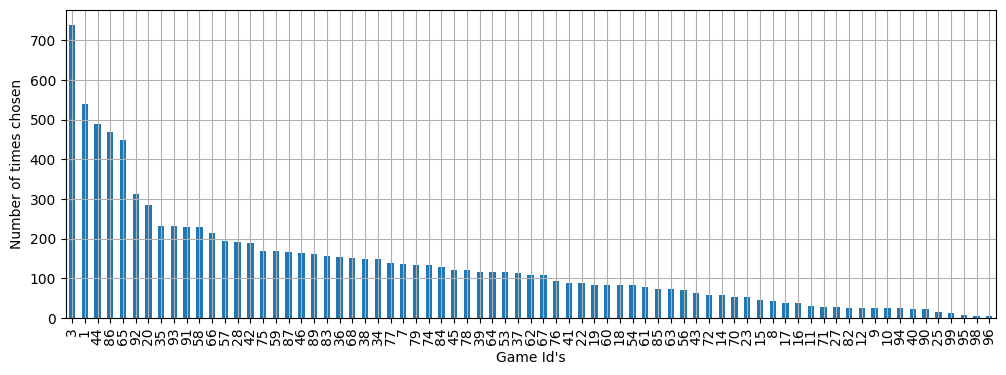

In [28]:
# which games are most often chosen from recommended

where_click = sessions_total[sessions_total["click_recommend"].notna()]
where_click["click_recommend"] = where_click["click_recommend"].astype("int")
ax = where_click["click_recommend"].value_counts(sort=True).plot.bar(figsize=(12, 4))   # .hist(bins=games.size, figsize=(20, 6))
print(sessions_total["click_recommend"].mode()) # most frequent value, alternative .value_counts().idxmax()

plt.title(label="")
plt.grid()
ax.set_xlabel("Game Id's")
ax.set_ylabel("Number of times chosen")

print(sessions_total["click_recommend"].value_counts().head(10))

0    3
Name: gameid, dtype: int64
25    25
27    45
10    48
95    54
40    55
96    58
71    60
9     67
12    73
15    75
Name: gameid, dtype: int64


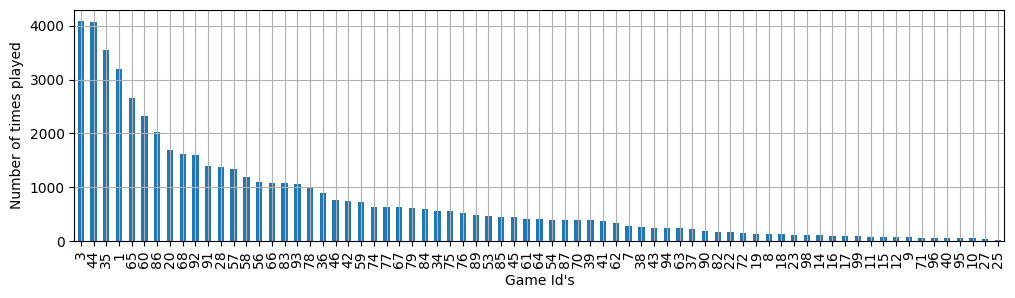

In [29]:
# how often is each game played


ax = sessions_total["gameid"].value_counts(sort=True).plot.bar(figsize=(12, 3)) #.hist(bins=games.size, figsize=(20, 6))
print(sessions_total["gameid"].mode())

plt.title(label="")
plt.grid()
ax.set_xlabel("Game Id's")
ax.set_ylabel("Number of times played")

print(sessions_total["gameid"].value_counts(sort=True, ascending=True).head(10))

gameid
15    3.134241
14    3.056174
22    3.001428
18    2.422756
19    2.196353
Name: duration, dtype: float64
68


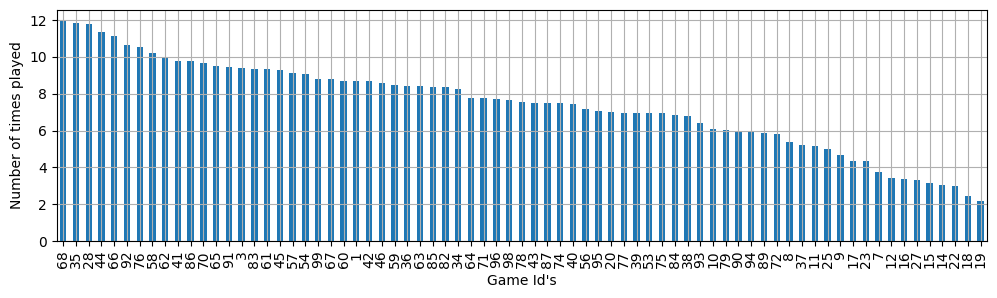

In [30]:
# what is average duration of gameplay

_df = sessions_total[sessions_total["duration"] < 30].groupby(["gameid"])["duration"].mean().sort_values(ascending=False)
print(_df.tail())
ax = _df.plot.bar( figsize=(12, 3))

plt.title(label="")
plt.grid()
ax.set_xlabel("Game Id's")
ax.set_ylabel("Number of times played")

print(_df.idxmax())




gameid
15    3.134241
14    3.056174
22    3.001428
18    2.422756
19    2.196353
Name: duration, dtype: float64
35


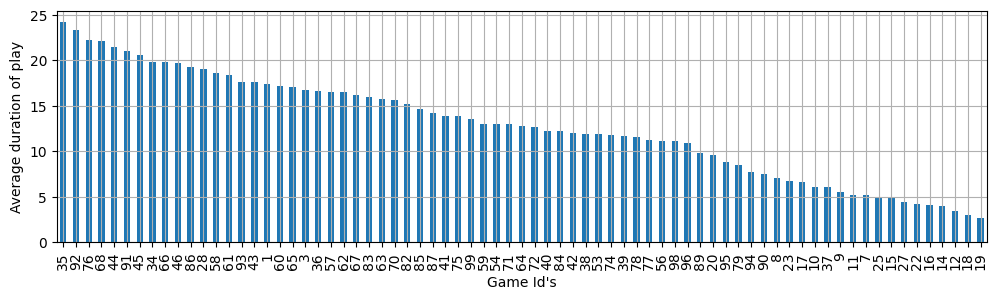

In [31]:
_df2 = sessions_total.groupby(["gameid"])["duration"].mean().sort_values(ascending=False)
print(_df.tail())
ax = _df2.plot.bar(figsize=(12, 3))

plt.title(label="")
plt.grid()
ax.set_xlabel("Game Id's")
ax.set_ylabel("Average duration of play")

print(_df2.idxmax())

In [32]:
_df.sort_values(ascending=False).head(10)

gameid
68    11.954341
35    11.865021
28    11.805109
44    11.330221
66    11.120919
92    10.646348
76    10.520814
58    10.218522
62     9.944276
41     9.760329
Name: duration, dtype: float64

In [33]:
_df2.sort_values(ascending=False).head(10)

gameid
35    24.216629
92    23.357715
76    22.220573
68    22.086307
44    21.514175
91    21.009560
45    20.538014
34    19.776985
66    19.764276
46    19.750110
Name: duration, dtype: float64

userid
1094029    62
1106110    61
1081988    60
1104324    59
1094721    57
Name: gameid, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index: 3026 entries, 891982 to 1256935
Series name: gameid
Non-Null Count  Dtype
--------------  -----
3026 non-null   int64
dtypes: int64(1)
memory usage: 47.3 KB
None
count    3026.000000
mean        7.191342
std         7.572290
min         1.000000
25%         3.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: gameid, dtype: float64


Text(0, 0.5, 'Number of players')

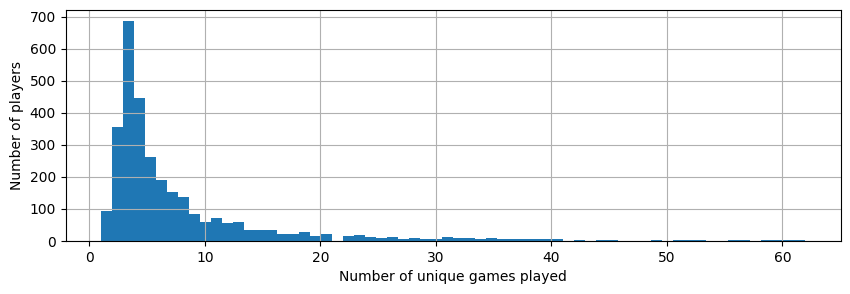

In [64]:
# number of unique games played by each user

sessions_total = sessions_total[sessions_total["gameid"] != 48]

_df = sessions_total.groupby(["userid"])["gameid"].nunique()
print(_df.sort_values(ascending=False).head())
print(_df.info())
print(_df.describe())
ax = _df.hist(bins=64,figsize=(10, 3))

plt.title(label="")
# plt.grid()
ax.set_xlabel("Number of unique games played")
ax.set_ylabel("Number of players")

userid
985507     28.350000
1104209    27.666700
1085748    26.650000
981218     26.333300
1058397    26.283350
1036178    25.500000
980891     25.433350
1087321    24.500000
1089358    24.425000
1175300    23.705567
Name: duration, dtype: float64


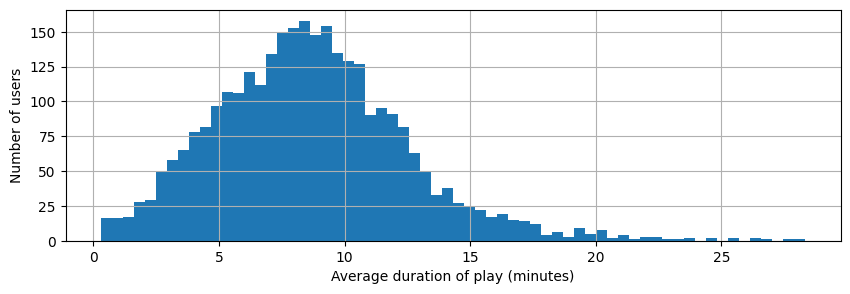

In [66]:

_dfduration = sessions_total.query("duration <= 30").groupby(["userid"])["duration"].mean().sort_values(ascending=False)

print(_dfduration.head(10))
ax = _dfduration.hist(bins=64,figsize=(10, 3))

plt.title(label="")
# plt.grid()
ax.set_xlabel("Average duration of play (minutes)")
ax.set_ylabel("Number of users")

most_active_users = _dfduration.where(_dfduration > 500)


gameid
68    11.954341
35    11.865021
28    11.820502
44    11.335944
66    11.120919
92    10.662462
76    10.520814
58    10.218522
62     9.944276
86     9.765228
Name: duration, dtype: float64


<Axes: >

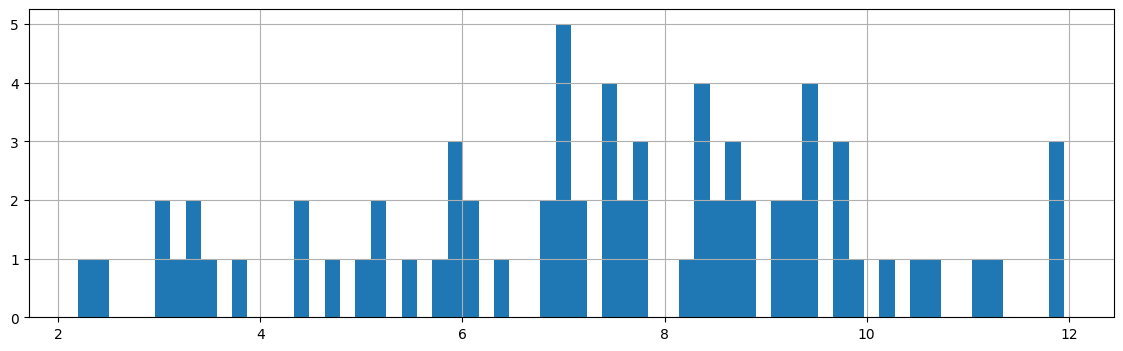

In [36]:

_dfduration = sessions_total.query("duration <= 30").groupby("gameid")["duration"].mean().sort_values(ascending=False)

print(_dfduration.head(10))
_dfduration.hist(bins=64,figsize=(14, 4))


0    3
Name: gameid, dtype: int64
3     4092
44    4076
35    3552
1     3197
65    2660
60    2325
86    2020
20    1692
68    1614
92    1590
Name: gameid, dtype: int64


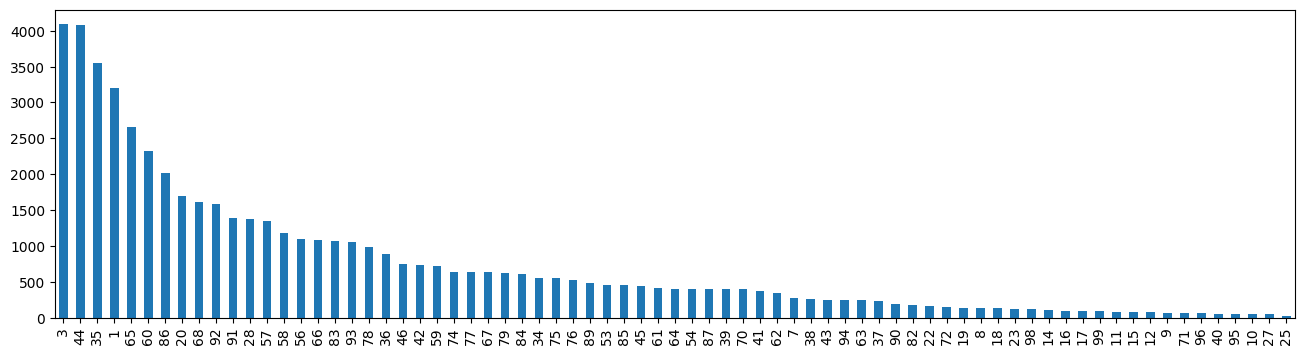

In [37]:

_df = sessions_total[sessions_total["userid"].isin(most_active_users.index)]["gameid"]
_df.value_counts(sort=True).plot.bar(figsize=(16, 4))
print(sessions_total["gameid"].mode())

print(_df.value_counts().head(10))



# Average learning index over time

count    36.000000
mean      0.964636
std       0.119985
min       0.727526
25%       0.871968
50%       0.964316
75%       1.079296
max       1.207547
Name: learn_index, dtype: float64


<Axes: xlabel='session_date'>

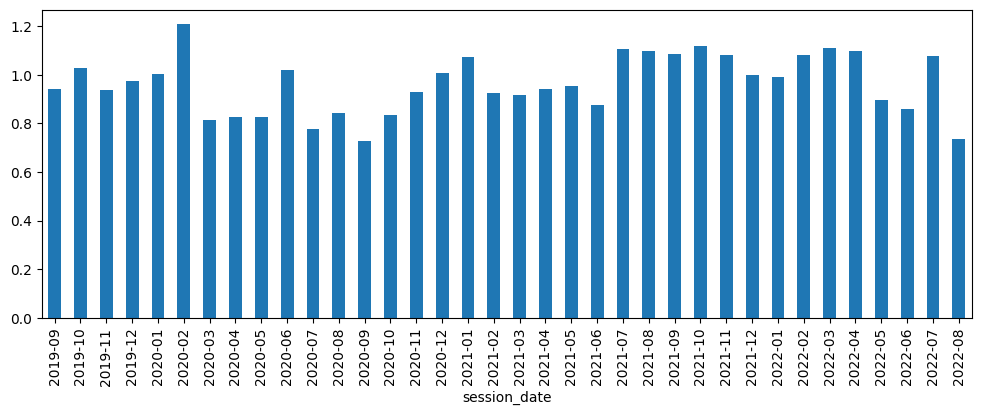

In [38]:
from datetime import timedelta
_df = sessions_total.copy()
_df["session_date"] = _df['session_date'].dt.to_period('M') # strip time information
# _df['session_date'] = pd.to_datetime(_df['session_date'])
# _df2 = (_df.sort_values("session_date").rolling(pd.Timedelta(100, "d"), min_periods=10, on="session_date"))["learn_index"].mean()
_df2 = _df.groupby("session_date")["learn_index"].mean()
print(_df2.describe())
_df2.plot.bar(figsize=(12,4))


count    36.000000
mean      1.064341
std       0.137059
min       0.738329
25%       0.959604
50%       1.081403
75%       1.144268
max       1.364641
Name: learn_index, dtype: float64


<Axes: xlabel='session_date'>

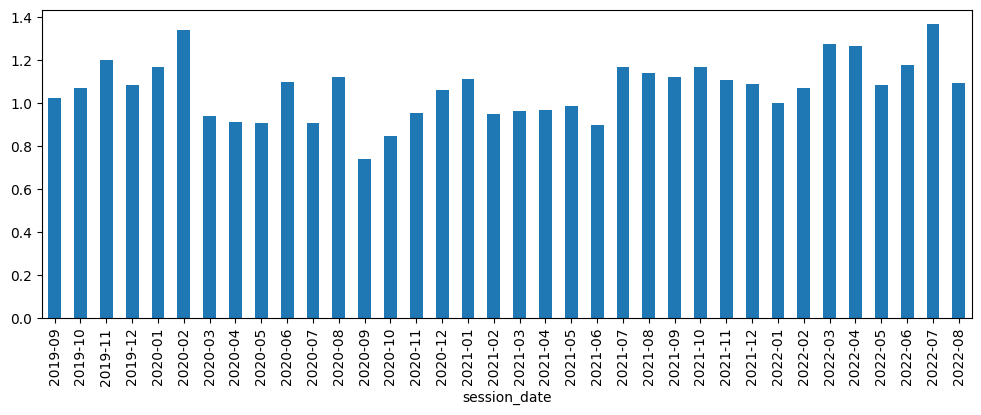

In [39]:
_df = sessions_camp.copy()
_df["session_date"] = _df['session_date'].dt.to_period('M') # strip time information
# _df['session_date'] = pd.to_datetime(_df['session_date'])
# _df2 = (_df.sort_values("session_date").rolling(pd.Timedelta(100, "d"), min_periods=10, on="session_date"))["learn_index"].mean()
_df2 = _df.groupby("session_date")["learn_index"].mean()
print(_df2.describe())
_df2.plot.bar(figsize=(12,4))



count    36.000000
mean      0.748550
std       0.148775
min       0.474860
25%       0.651305
50%       0.753722
75%       0.817859
max       1.177305
Name: learn_index, dtype: float64


<Axes: xlabel='session_date'>

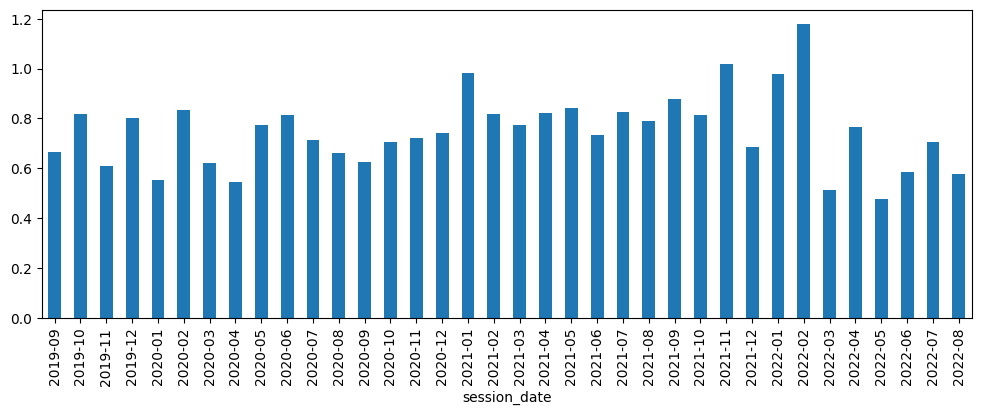

In [40]:
_df = sessions_org.copy()
_df["session_date"] = _df['session_date'].dt.to_period('M') # strip time information
# _df['session_date'] = pd.to_datetime(_df['session_date'])
# _df2 = (_df.sort_values("session_date").rolling(pd.Timedelta(100, "d"), min_periods=10, on="session_date"))["learn_index"].mean()
_df2 = _df.groupby("session_date")["learn_index"].mean()
print(_df2.describe())
_df2.plot.bar(figsize=(12,4))


# Average duration over time

count    36.000000
mean     15.738075
std       2.428147
min       8.739969
25%      14.331525
50%      16.196820
75%      17.508749
max      19.922278
Name: duration, dtype: float64


<Axes: xlabel='session_date'>

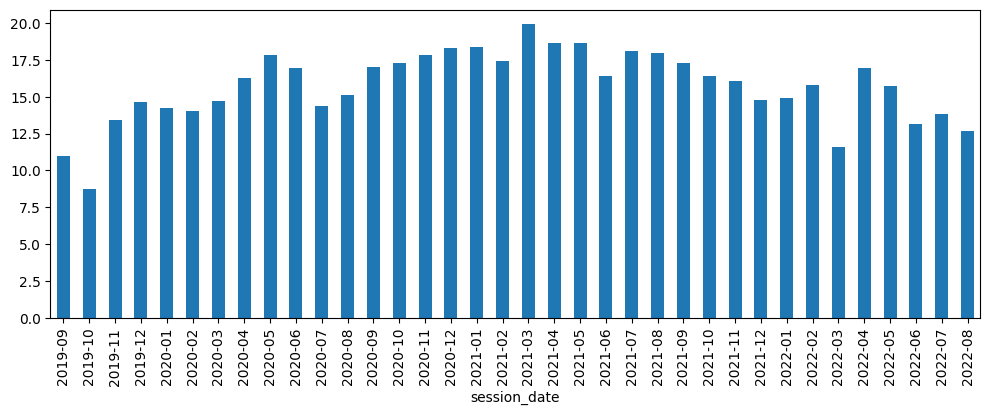

In [41]:
from datetime import timedelta
_df = sessions_total.copy()
_df["session_date"] = _df['session_date'].dt.to_period('M') # strip time information
# _df['session_date'] = pd.to_datetime(_df['session_date'])
# _df2 = (_df.sort_values("session_date").rolling(pd.Timedelta(100, "d"), min_periods=10, on="session_date"))["learn_index"].mean()
_df2 = _df.groupby("session_date")["duration"].mean()
print(_df2.describe())
_df2.plot.bar(figsize=(12,4))

count        36.000000
mean      25314.353611
std       29357.808748
min        2643.184500
25%        6553.879775
50%       17101.650450
75%       27848.008500
max      125797.616100
Name: duration, dtype: float64


Text(0, 0.5, 'Total play time')

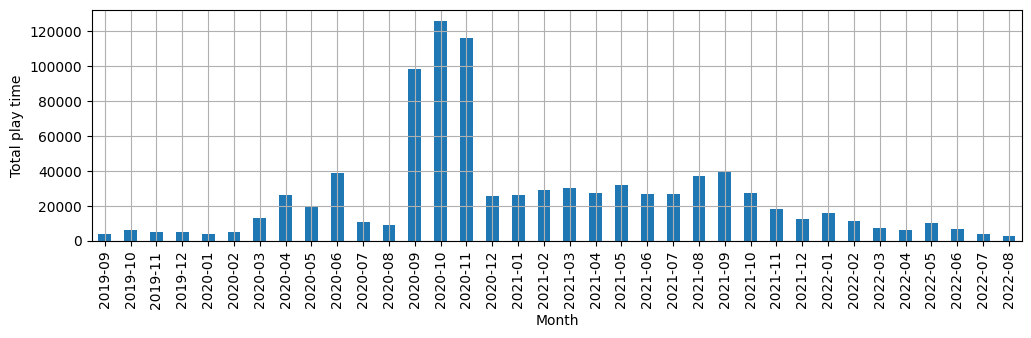

In [42]:
# sum of duration

_df2 = _df.groupby("session_date")["duration"].sum()
print(_df2.describe())
ax = _df2.plot.bar(figsize=(12,3))

plt.title(label="")
plt.grid()
ax.set_xlabel("Month")
ax.set_ylabel("Total play time")


count      36.000000
mean     1500.166667
std      1652.665648
min       208.000000
25%       579.500000
50%      1102.000000
75%      1652.250000
max      7262.000000
Name: sessionid, dtype: float64


Text(0, 0.5, 'Number of sessions')

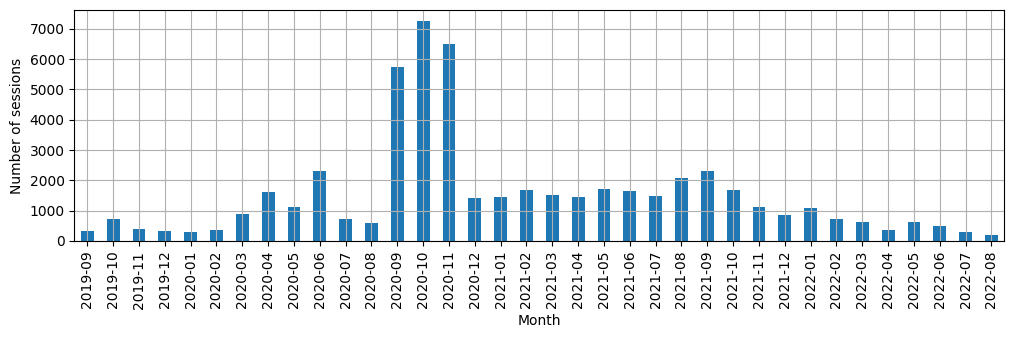

In [43]:
_df2 = _df.groupby("session_date")["sessionid"].count()
print(_df2.describe())
ax = _df2.plot.bar(figsize=(12,3))

plt.title(label="")
plt.grid()
ax.set_xlabel("Month")
ax.set_ylabel("Number of sessions")

# Cosine sim

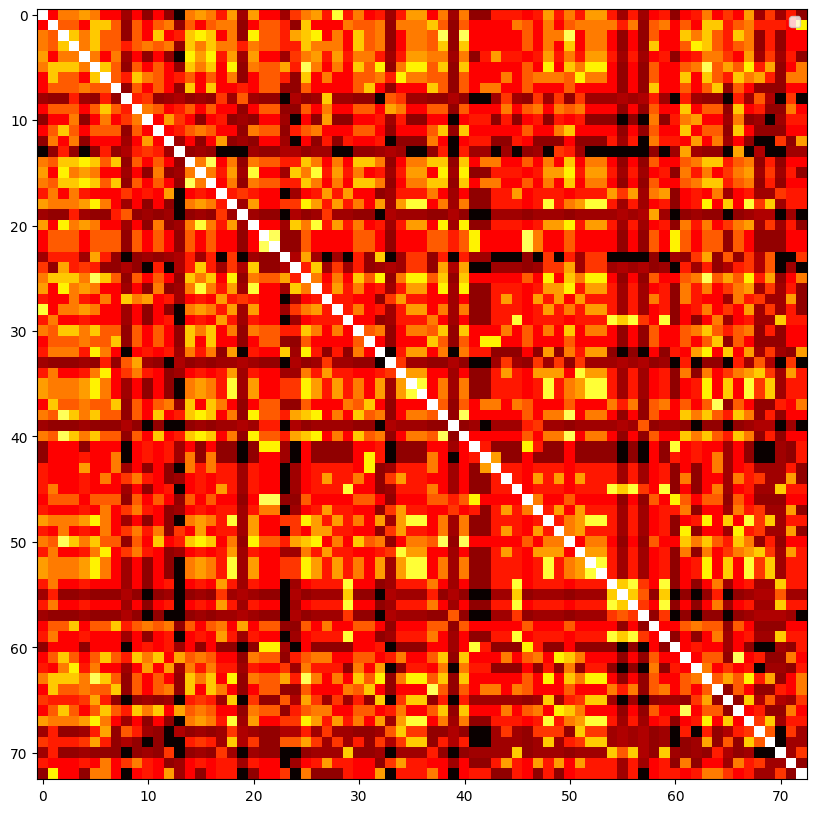

In [44]:

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

Data = sessions_total[
    ["userid", "sessionid", "duration", "learn_index", "gameid", "session_date"]
].copy()


# Data["session_date"] = Data["session_date"].values.astype("int64")

Data = pd.merge(
    Data, players_total[["userid", "age", "gender"]], on="userid", how="left"
)

# One column for each subject and mechanic and schoollevel
Data = pd.merge(
    Data,
    games[["gameid", "subject", "game_mechanic", "school_level"]],
    on="gameid",
    how="left",
)

# No one hot encoding instead set type as categorical
Categorical_Data = Data.astype(
    {
        "gameid": "category",
        "gender": "category",
        "subject": "category",
        "game_mechanic": "category",
        "school_level": "category",
    }
)


Data = pd.get_dummies(Data, columns=["gameid"], prefix="gameid")

Data = pd.get_dummies(Data, columns=["subject"], prefix="subject")
Data = pd.get_dummies(Data, columns=["game_mechanic"], prefix="game_mechanic")
# Data = pd.get_dummies(Data, columns=["school_level"], prefix="school_level")

school_ll = Data["school_level"].str.get_dummies(", ")
Data = Data.join(school_ll, how="left", lsuffix="school_level")
Data = Data.drop("school_level", axis=1)

game_data = Data.drop(["userid", "sessionid", "duration", "learn_index", "session_date", "age", "gender"], axis=1).drop_duplicates()

cos_sim = cosine_similarity(game_data, game_data)

plt.figure(figsize=(10,10))
plt.imshow(cos_sim, cmap="hot", interpolation="nearest")
plt.legend()


# Averge learning index for each game

gameid
56    2.216713
28    2.125996
66    1.937443
57    1.927138
70    1.679389
38    1.635294
27    1.600000
74    1.543750
61    1.541872
71    1.533333
Name: learn_index, dtype: float64


Text(0, 0.5, 'Average learning index')

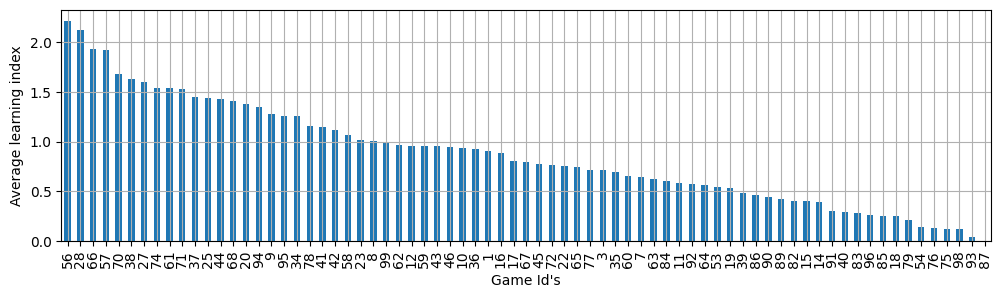

In [45]:
_df2 = sessions_total.groupby(["gameid"])["learn_index"].mean().sort_values(ascending=False)
ax = _df2.plot.bar(figsize=(12, 3))

print(_df2.head(10))

plt.title(label="")
plt.grid()
ax.set_xlabel("Game Id's")
ax.set_ylabel("Average learning index")


# Per age and gender

<ipython-input-46-799c67b9b8dd>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = Data.drop(["userid", "sessionid", "gender"],axis=1).groupby(["gameid", "age"]).mean()


<Axes: xlabel='age'>

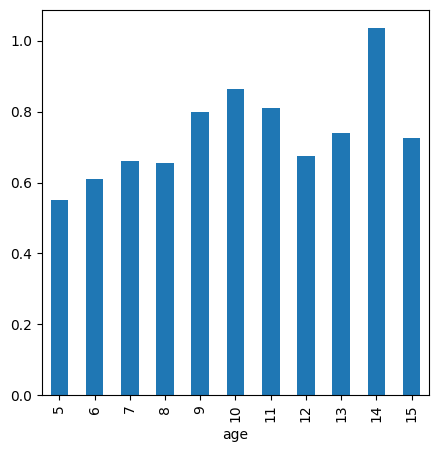

In [46]:
Data = sessions_total[
    ["userid", "sessionid", "duration", "learn_index", "gameid", "session_date"]
].copy()


# Data["session_date"] = Data["session_date"].values.astype("int64")

Data = pd.merge(
    Data, players_total[["userid", "age", "gender"]], on="userid", how="left"
)

# One column for each subject and mechanic and schoollevel
# Data = pd.merge(
#     Data,
#     games[["gameid", "subject", "game_mechanic", "school_level"]],
#     on="gameid",
#     how="left",
# )

df = Data.drop(["userid", "sessionid", "gender"],axis=1).groupby(["gameid", "age"]).mean()
# df.describe()
# df.head()
# .loc["3"].hist()
df.loc[3]["learn_index"].plot.bar(figsize=(5,5))
# df.loc[44]["learn_index"].plot.bar(figsize=(10,5))

# df.loc[3]["duration"].plot.bar(figsize=(10,5))
# df.loc[44]["duration"].plot.bar(figsize=(10,5))


<Axes: xlabel='age'>

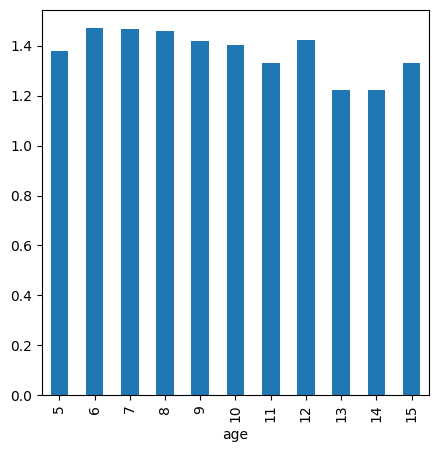

In [47]:

df.loc[44]["learn_index"].plot.bar(figsize=(5,5))

<Axes: xlabel='age'>

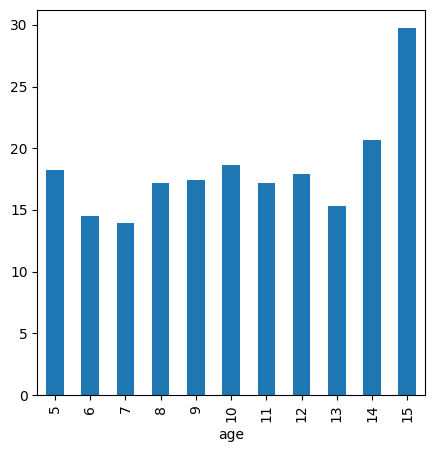

In [48]:

df.loc[3]["duration"].plot.bar(figsize=(5,5))

<Axes: xlabel='age'>

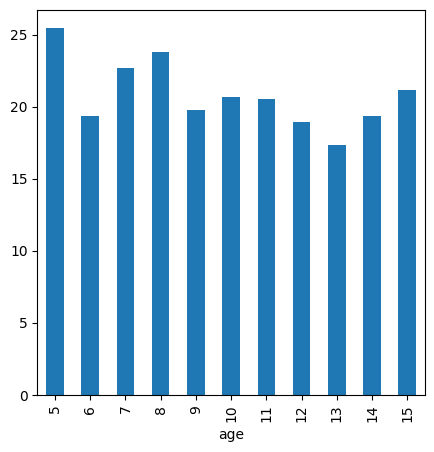

In [49]:

df.loc[44]["duration"].plot.bar(figsize=(5,5))

                duration  learn_index
gameid gender                        
1      1       17.038852     0.904362
       2       17.818689     0.920511
3      1       15.972164     0.782754
       2       17.854649     0.608338
7      1        5.186181     0.765823
       2        5.179168     0.483333
8      1        6.844595     0.922078
       2        7.222223     1.122807
9      1        4.943943     1.431818
       2        6.699270     1.000000
10     1        3.806530     0.913043
       2        8.169328     0.960000
11     1        4.366325     0.520833
       2        6.540238     0.689655
12     1        3.126247     1.125000
       2        3.776770     0.757576
14     1        4.738634     0.363636
       2        3.514902     0.409091
15     1        7.863900     0.533333
       2        2.853336     0.311111


<Axes: xlabel='gender'>

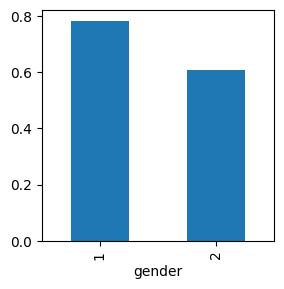

In [50]:

df = Data.drop(["userid", "sessionid", "age"],axis=1).groupby(["gameid", "gender"])[["duration", "learn_index"]].mean()
# df.describe()
print(df.head(20))
# .loc["3"].hist()
df.loc[3]["learn_index"].plot.bar(figsize=(3,3))


<Axes: xlabel='gender'>

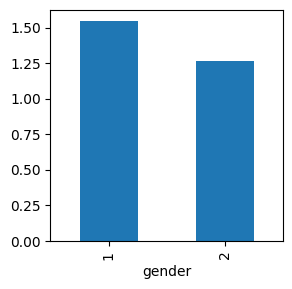

In [51]:
df.loc[44]["learn_index"].plot.bar(figsize=(3,3))

<Axes: xlabel='gender'>

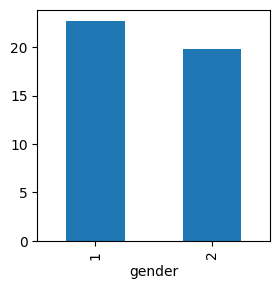

In [52]:
df.loc[44]["duration"].plot.bar(figsize=(3,3))


<Axes: xlabel='gender'>

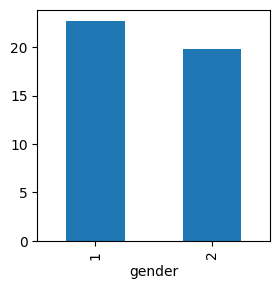

In [53]:

df.loc[44]["duration"].plot.bar(figsize=(3,3))


# Most popular subject, mechanic

Text(0, 0.5, 'Number of sessions')

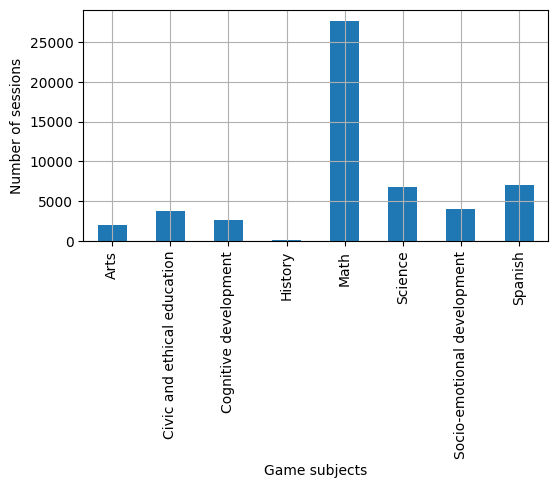

In [54]:

Data = sessions_total[
    ["userid", "sessionid", "duration", "learn_index", "gameid", "session_date"]
].copy()


# Data["session_date"] = Data["session_date"].values.astype("int64")

Data = pd.merge(
    Data, games[["gameid", "subject", "game_mechanic"]], on="gameid", how="left"
)


ax = Data.groupby("subject")["sessionid"].count().plot.bar(figsize=(6, 3)) #.hist(bins=games.size, figsize=(20, 6))
#print(sessions_total["gameid"].mode())


plt.title(label="")
plt.grid()
ax.set_xlabel("Game subjects")
ax.set_ylabel("Number of sessions")


Text(0, 0.5, 'Number of sessions')

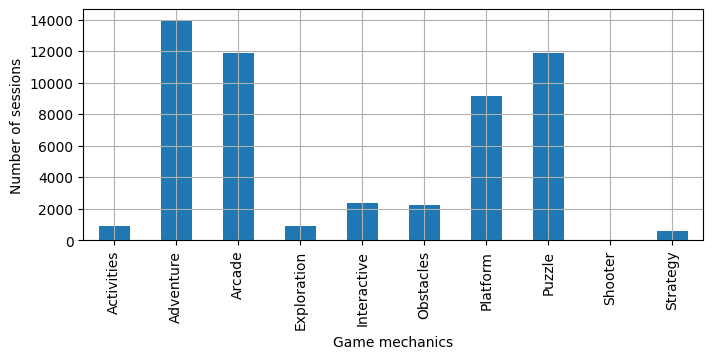

In [55]:

ax = Data.groupby("game_mechanic")["sessionid"].count().plot.bar(figsize=(8, 3)) #.hist(bins=games.size, figsize=(20, 6))



plt.title(label="")
plt.grid()
ax.set_xlabel("Game mechanics")
ax.set_ylabel("Number of sessions")
